# Introdução a Redes Neurais
## Atividade 02
#### Utilizar o MPL Classification para classificação dos dados do IMC

Import das bibliotecas:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Definição das variáveis do DataFrame:

In [2]:
n_pts = 200
peso =[]
altura = []
imc = []
estado = []
for i in range(n_pts):
    delta_peso = abs(np.random.randn())
    peso.append(40 + 30*delta_peso)    
    delta_altura = abs(np.random.randn())
    altura.append( 1.30 + 0.3*delta_altura)
    imc.append(peso[-1] / (altura[-1] * altura[-1] ))  
    if imc[-1] < 18.5:
        estado.append('Magro')
    if imc[-1] >= 18.5 and imc[-1] < 25.0:
        estado.append('Normal')
    if imc[-1] >= 25.0 and imc[-1] < 30.0:
        estado.append('Sobrepeso')
    if imc[-1] >= 30.0:
        estado.append('Obeso')

data = {'Peso':peso,'Altura':altura,'IMC':imc, 'Estado':estado}
imc_data = pd.DataFrame(data)
#imc_data

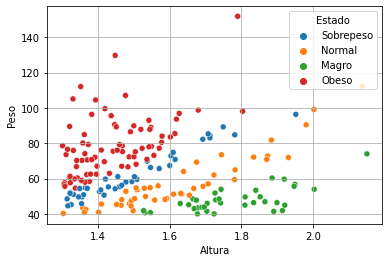

In [3]:
sns.scatterplot(x='Altura', y='Peso', hue='Estado', data=imc_data)
plt.grid()
plt.show()

Adicionar coluna "Estado" ao DF que indicará a saída da RNA.

Magro: 01 / 
Normal: 02 / 
Obeso: 03 / 
Sobrepeso: 04

In [4]:
imc_data.loc[imc_data['Estado'] == 'Magro', 'Estado'] = 1
imc_data.loc[imc_data['Estado'] == 'Normal', 'Estado'] = 2
imc_data.loc[imc_data['Estado'] == 'Sobrepeso', 'Estado'] = 3
imc_data.loc[imc_data['Estado'] == 'Obeso', 'Estado'] = 4
#display(imc_data)

In [5]:
x = imc_data[['Peso','Altura']]  # features
#x

In [6]:
y = imc_data.iloc[:,3].values.astype(None)  # features
#y

Plot dos dados:

Text(0, 0.5, 'Peso')

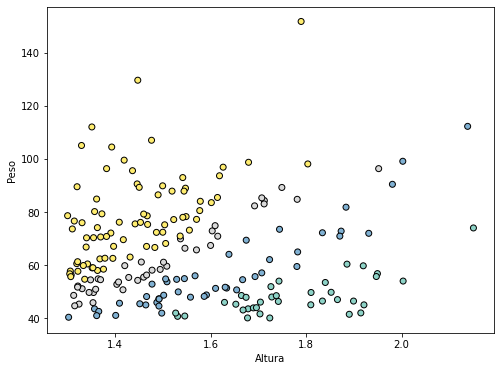

In [7]:
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(x['Altura'], x['Peso'], cmap=plt.cm.Set3, c=y, edgecolor="k")
plt.xlabel("Altura")
plt.ylabel("Peso")

### Separação dos dados para treinamento e teste:

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1,test_size=0.2)
#y_train
#y_test

Plot dos dados separados:

(30.058018865488897, 161.80898689198003)

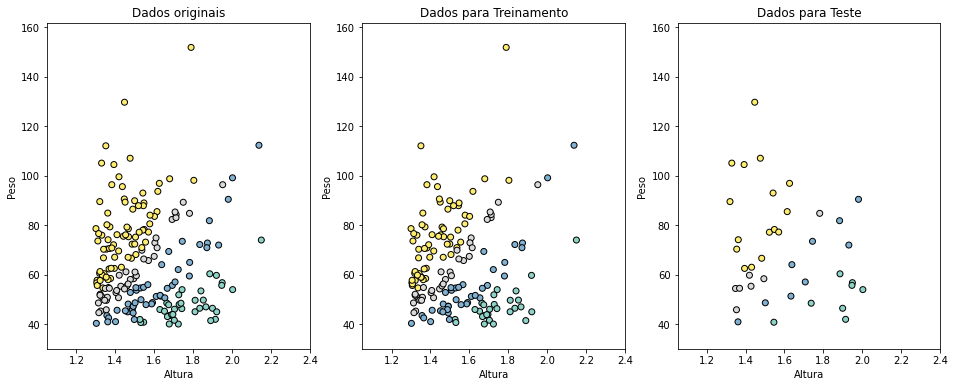

In [10]:
plt.figure(2, figsize=(16, 6))
plt.clf()

x_min = x['Altura'].min()
x_max = x['Altura'].max()
y_min = x['Peso'].min()
y_max = x['Peso'].max()

plt.subplot(1,3,1)
plt.scatter(x=x['Altura'], y=x['Peso'], c=y, cmap=plt.cm.Set3, edgecolor="k")
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.title('Dados originais')
plt.xlim(x_min-0.25, x_max+0.25)
plt.ylim(y_min-10, y_max+10)

plt.subplot(1,3,2)
plt.scatter(x=x_train['Altura'], y=x_train['Peso'], c=y_train, cmap=plt.cm.Set3, edgecolor="k")
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.title('Dados para Treinamento')
plt.xlim(x_min-0.25, x_max+0.25)
plt.ylim(y_min-10, y_max+10)


plt.subplot(1,3,3)
plt.scatter(x=x_test['Altura'], y=x_test['Peso'], c=y_test, cmap=plt.cm.Set3, edgecolor="k")
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.title('Dados para Teste')
plt.xlim(x_min-0.25, x_max+0.25)
plt.ylim(y_min-10, y_max+10)

### Normalização dos dados:

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc_x = StandardScaler()
x_trainscaled = sc_x.fit_transform(x_train)
#x_trainscaled

In [13]:
x_testscaled = sc_x.fit_transform(x_test)
#x_testscaled

Plot dos dados normalizados:

Text(0.5, 1.0, 'Depois')

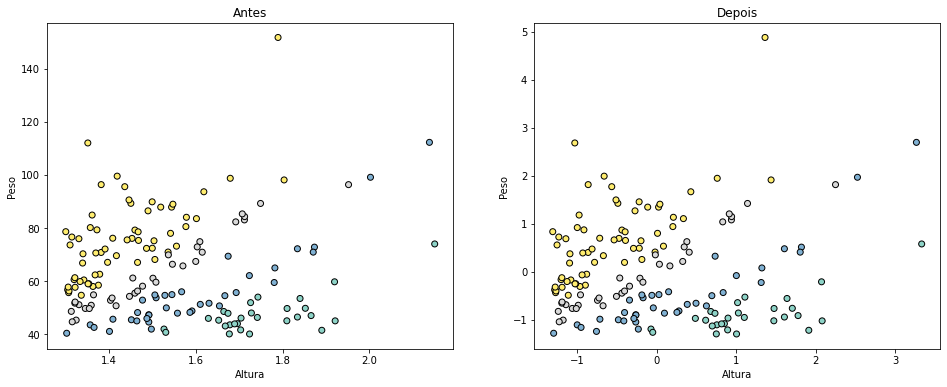

In [14]:
plt.figure(2, figsize=(16, 6))
plt.clf()

plt.subplot(1,2,1)
plt.scatter(x_train['Altura'], x_train['Peso'], c=y_train, cmap=plt.cm.Set3, edgecolor="k")
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.title('Antes')

plt.subplot(1,2,2)
plt.scatter(x_trainscaled[:,1], x_trainscaled[:,0], c=y_train, cmap=plt.cm.Set3, edgecolor="k")
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.title('Depois')

Text(0.5, 1.0, 'Depois')

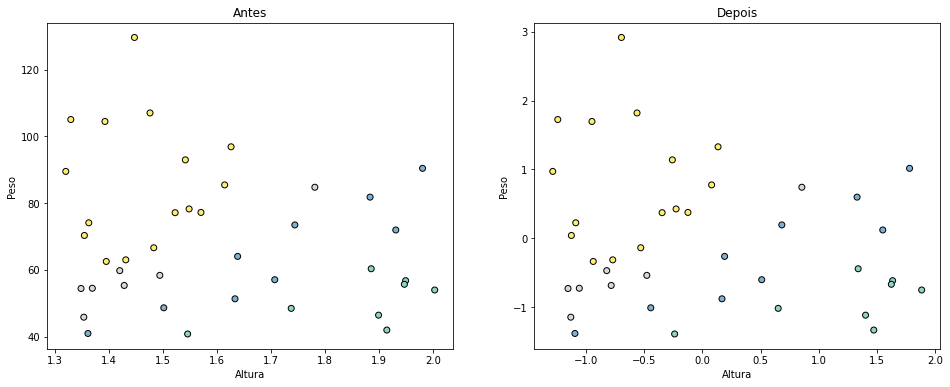

In [15]:
plt.figure(2, figsize=(16, 6))
plt.clf()

plt.subplot(1,2,1)
plt.scatter(x_test['Altura'], x_test['Peso'], c=y_test, cmap=plt.cm.Set3, edgecolor="k")
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.title('Antes')

plt.subplot(1,2,2)
plt.scatter(x_testscaled[:,1], x_testscaled[:,0], c=y_test, cmap=plt.cm.Set3, edgecolor="k")
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.title('Depois')

Análise dos dados:

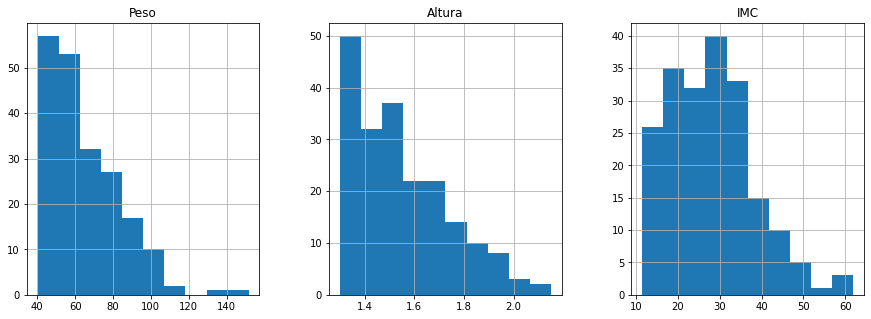

In [16]:
# Histogramas
imc_data.hist(bins=10,figsize=(15, 5), layout=(1,3))
plt.show()

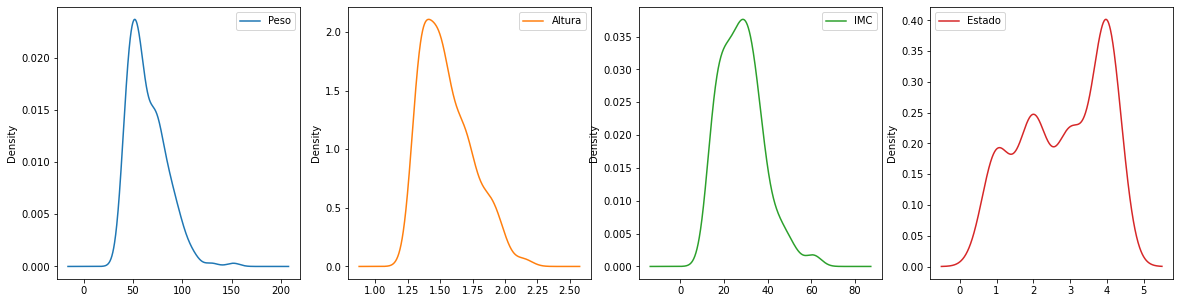

In [17]:
# Densidade
imc_data.plot(kind='density', figsize=(20, 5), subplots=True, layout=(1,4), sharex=False)
plt.show()

<AxesSubplot:>

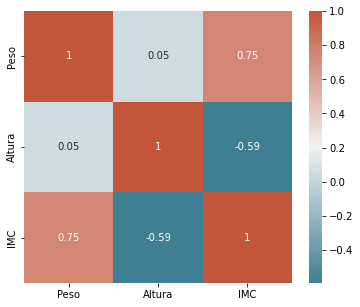

In [18]:
corr = imc_data.corr()
plt.subplots(figsize=(6,5))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Text(0.5, 1.0, 'Depois')

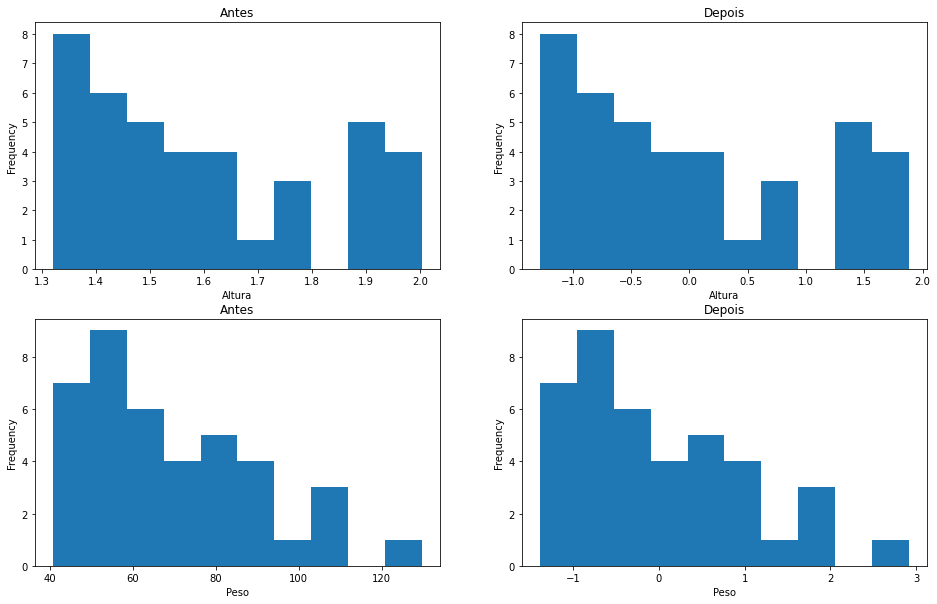

In [19]:
plt.figure(2, figsize=(16, 10))
plt.clf()

plt.subplot(2,2,1)
plt.hist(x_test['Altura'])
plt.xlabel("Altura")
plt.ylabel("Frequency")
plt.title('Antes')

plt.subplot(2,2,2)
plt.hist(x_testscaled[:,1])
plt.xlabel("Altura")
plt.ylabel("Frequency")
plt.title('Depois')

plt.subplot(2,2,3)
plt.hist(x_test['Peso'])
plt.xlabel("Peso")
plt.ylabel("Frequency")
plt.title('Antes')

plt.subplot(2,2,4)
plt.hist(x_testscaled[:,0])
plt.xlabel("Peso")
plt.ylabel("Frequency")
plt.title('Depois')

In [20]:
# Create pivot_table
colum_names = ['Peso', 'Altura', 'IMC']
df_pivot_table = imc_data.pivot_table(colum_names,['Estado'], aggfunc='median')
print(df_pivot_table)

          Altura        IMC       Peso
Estado                                
1       1.739695  15.404732  46.361905
2       1.576839  21.259374  52.228208
3       1.457089  27.318184  57.160368
4       1.417786  35.428221  76.020729


### Criação do modelo MLP:

In [28]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(hidden_layer_sizes=(30,30),activation="relu",random_state=1,verbose=True)
mlpc.fit(x_trainscaled, y_train)
y_pred=mlpc.predict(x_testscaled)

Iteration 1, loss = 1.44397821
Iteration 2, loss = 1.43210016
Iteration 3, loss = 1.42046037
Iteration 4, loss = 1.40903579
Iteration 5, loss = 1.39774019
Iteration 6, loss = 1.38662128
Iteration 7, loss = 1.37570350
Iteration 8, loss = 1.36496635
Iteration 9, loss = 1.35444355
Iteration 10, loss = 1.34416135
Iteration 11, loss = 1.33412033
Iteration 12, loss = 1.32428343
Iteration 13, loss = 1.31464490
Iteration 14, loss = 1.30513868
Iteration 15, loss = 1.29574092
Iteration 16, loss = 1.28647271
Iteration 17, loss = 1.27735190
Iteration 18, loss = 1.26833835
Iteration 19, loss = 1.25941386
Iteration 20, loss = 1.25055157
Iteration 21, loss = 1.24172162
Iteration 22, loss = 1.23292853
Iteration 23, loss = 1.22414515
Iteration 24, loss = 1.21538609
Iteration 25, loss = 1.20659039
Iteration 26, loss = 1.19776511
Iteration 27, loss = 1.18890127
Iteration 28, loss = 1.17998992
Iteration 29, loss = 1.17106165
Iteration 30, loss = 1.16213897
Iteration 31, loss = 1.15316040
Iteration 32, los

C:\Users\Camila B. Cavalcanti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
score = mlpc.score(x_testscaled, y_test)
print("Training Score: ", score)

Training Score:  0.95


In [30]:
from sklearn.metrics import r2_score
r_score = r2_score(y_test, y_pred)
print("Testing Score: ", r_score)

Testing Score:  0.9636198271941792


    y_test  y_pred
10     3.0     3.0
32     1.0     1.0
21     4.0     4.0
5      4.0     4.0
0      1.0     1.0
24     4.0     4.0
38     1.0     1.0
8      4.0     4.0
4      4.0     4.0
25     4.0     4.0


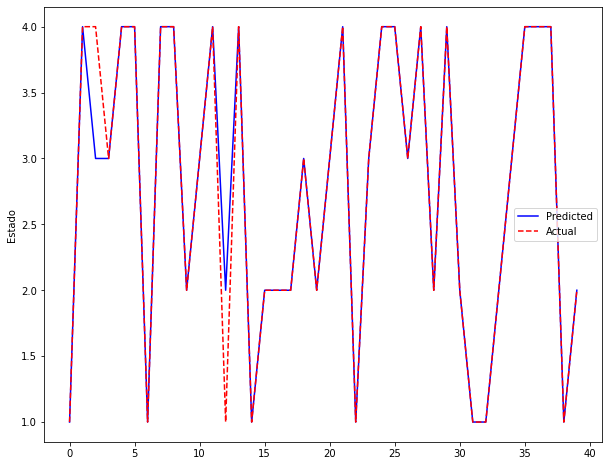

In [31]:
pred_results = pd.DataFrame({'y_test': y_test.flatten(), 'y_pred': y_pred.flatten()}, index=range(len(y_pred)))
print(pred_results.sample(10))
plt.figure(figsize=(10, 8))
plt.plot(y_pred, '-b', label='Predicted')
plt.plot(y_test, '--r', label='Actual')
plt.ylabel("Estado")
plt.legend()
plt.show()

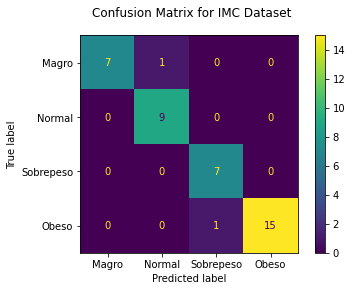

In [32]:
from sklearn.metrics import plot_confusion_matrix
fig=plot_confusion_matrix(mlpc, x_testscaled, y_test, display_labels=["Magro","Normal","Sobrepeso","Obeso"])
fig.figure_.suptitle("Confusion Matrix for IMC Dataset")
plt.show()

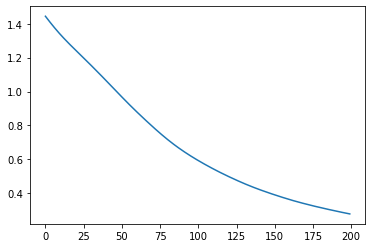

In [33]:
plt.plot(mlpc.loss_curve_)

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      0.88      0.93         8
         2.0       0.90      1.00      0.95         9
         3.0       0.88      1.00      0.93         7
         4.0       1.00      0.94      0.97        16

    accuracy                           0.95        40
   macro avg       0.94      0.95      0.95        40
weighted avg       0.96      0.95      0.95        40

[[ 7  1  0  0]
 [ 0  9  0  0]
 [ 0  0  7  0]
 [ 0  0  1 15]]


Como o esperado, excelentes resultados foram alcançados comparados aos anteriormente obtidos. Visto que uma configuração de RN mais robusta foi implementada.